In [1]:
import pandas as pd
data_all = pd.read_excel("gamezone-orders-data - Copy.xlsx", sheet_name=None)
wb1 = data_all['orders_clean']

In [3]:
wb1.describe(include=object)

,USER_ID,ORDER_ID,PURCHASE_TS,PRODUCT_NAME,PRODUCT_ID,PURCHASE_PLATFORM,MARKETING_CHANNEL,ACCOUNT_CREATION_METHOD,COUNTRY_CODE
count,21864,21864,21864,21864,21864,21864,21781,21781,21826
unique,19851,21719,783,9,46,2,5,5,150
top,7216488f,f404ef0cf9f86493,2020-12-19 00:00:00,Nintendo Switch,8d0d,website,direct,desktop,US
freq,4,2,95,10386,6024,19783,17434,16458,10294


In [142]:
wb1.columns
wb1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21864 entries, 0 to 21863
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   USER_ID                  21864 non-null  object        
 1   ORDER_ID                 21864 non-null  object        
 2   PURCHASE_TS              21864 non-null  object        
 3   SHIP_TS                  21864 non-null  datetime64[ns]
 4   PRODUCT_NAME             21864 non-null  object        
 5   PRODUCT_ID               21864 non-null  object        
 6   USD_PRICE                21859 non-null  float64       
 7   PURCHASE_PLATFORM        21864 non-null  object        
 8   MARKETING_CHANNEL        21781 non-null  object        
 9   ACCOUNT_CREATION_METHOD  21781 non-null  object        
 10  COUNTRY_CODE             21826 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 1.8+ MB


In [7]:
duplicateset = wb1[wb1.duplicated(['USER_ID','ORDER_ID','USD_PRICE'])]
#print(duplicateset, f"\n\nThe number of duplicates is: {len(duplicateset)}") >> LEN IS 37

In [7]:
#GROUPING OF DATA/ PIVOT TABLE VIEW
orderpivot = wb1.groupby('ORDER_ID')['USER_ID'].nunique() #Group by Order ID and count number of unique User values like pivot. Returns series
productpivot = wb1.groupby('PRODUCT_NAME')['PRODUCT_ID'].nunique()  #Applies nunique() on Product ID - counts unique non-null values, Output: Integer
productidcount = wb1.groupby('PRODUCT_NAME')['PRODUCT_ID'].value_counts()  #Applies value_counts() on Product ID - counts freq of each non-null values, Output: Series
print(productpivot, "\n\n Len: ", len(productpivot)) 
print(productidcount, "\n\n Len: ", len(productidcount))

#FILTERED SERIES
orderpivot_filter = orderpivot[orderpivot>1].index #Returns filtered series, index returns labels of the filtered series i.e. Order ID
productpivot_filter = productpivot[productpivot>1].index #All product IDs have 1 product name mapped, but 1 product name has multiple IDs

#CREATING A NEW DATAFRAME COMPRISING OF ONLY FILTERED VALUES
incons_ids = wb1[wb1['ORDER_ID'].isin(orderpivot_filter)] #create a new dataframe with only these Order IDs - table snippet to review 
incons_prod = wb1[wb1['PRODUCT_NAME'].isin(productpivot_filter)]
#print("\n\n Inconsistent Order ID mapping: \n", incons_ids)
#print("\n\n Inconsistent Product ID mapping: \n", incons_prod)

#CHECK CROSS MAPPING BETWEEN NEW DATAFRAME AND A SET OF DUPLICATE IDS - TO AVOID REMOVING ALL ENTRIES OF A GIVEN ID
incons_ids_updated = incons_ids[~(incons_ids['USER_ID'].isin(wb1.duplicated(['USER_ID','ORDER_ID','USD_PRICE'])))].index # just a test - but to create a dataset that EXCLUDES User IDs in the duplicateset to avoid removing both entries of a User ID as duplicateset will also be removed eventually
#print("\n\n", incons_ids_updated)

#CROSSTABS
pd.crosstab(wb1.PRODUCT_NAME,wb1.PRODUCT_ID)

PRODUCT_NAME
27in 4K gaming monitor             7
27inches 4k gaming monitor         3
Acer Nitro V Gaming Laptop         1
Dell Gaming Mouse                  7
JBL Quantum 100 Gaming Headset     7
Lenovo IdeaPad Gaming 3            3
Nintendo Switch                   12
Razer Pro Gaming Headset           2
Sony PlayStation 5 Bundle          4
Name: PRODUCT_ID, dtype: int64 

 Len:  9
PRODUCT_NAME                    PRODUCT_ID
27in 4K gaming monitor          891b          3545
                                e7e6          1102
                                1238             7
                                7f86             5
                                7599             1
                                8364             1
                                f443             1
27inches 4k gaming monitor      afbf            26
                                2a50            24
                                ab5d            11
Acer Nitro V Gaming Laptop      22ea            87
Dell Gam

PRODUCT_ID,1238,2997,5142,7388,7416,7599,8315,8364,03ca,04ac,...,b0ee,b5f7,da12,df85,e22d,e682,e7e6,f443,f5ca,f81e
PRODUCT_NAME,,,,,,,,,,,,,,,,,,,,,
27in 4K gaming monitor,7,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1102,1,0,0
27inches 4k gaming monitor,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Acer Nitro V Gaming Laptop,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Dell Gaming Mouse,0,0,49,0,31,0,0,0,0,0,...,72,0,0,0,0,0,0,0,0,169
JBL Quantum 100 Gaming Headset,0,93,0,1,0,0,539,0,0,0,...,0,0,0,0,0,0,0,0,20,0
Lenovo IdeaPad Gaming 3,0,0,0,0,0,0,0,0,0,433,...,0,0,0,0,0,0,0,0,0,0
Nintendo Switch,0,0,0,0,0,0,0,0,1,0,...,0,114,3,0,0,3806,0,0,0,0
Razer Pro Gaming Headset,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Sony PlayStation 5 Bundle,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,3,0,0,0,0,0


_**Creating a fresh dataframe by removing duplicates**_

In [4]:
wb_updated = wb1.drop_duplicates(['USER_ID','ORDER_ID','USD_PRICE'])  # removes 37 entries where all 3 column entries are repeated
wb_updated = wb1.drop_duplicates(['ORDER_ID'], keep = 'first')  # removes 108 entries where all Order ID entries are repeated, keeping first occurrences, inplace = False (default) returns a new dataframe
print(wb_updated)

        USER_ID           ORDER_ID          PURCHASE_TS    SHIP_TS  \
0        185974       508f065e0037  2020-12-10 00:00:00 2020-12-11   
1        249061      06ca589b49613  2019-11-19 00:00:00 2019-08-01   
2        266910      b735d123e3a16  2019-05-27 00:00:00 2019-05-30   
3        268826      2f9f6219a8b17  2020-03-31 00:00:00 2020-04-02   
4        292751      9ef23f5724b18  2020-10-22 00:00:00 2020-10-23   
...         ...                ...                  ...        ...   
21859  fff8131d  cf867805ca5108109  2020-05-09 00:00:00 2020-05-11   
21860  fff83841  c457f079f08108110  2020-12-10 00:00:00 2020-12-12   
21861  fff9f549  fb88e25c9f4108114  2020-04-29 00:00:00 2020-04-30   
21862  fffb781c  f2204197256108116  2021-02-26 00:00:00 2021-02-28   
21863  ffffde42  d561db13534108127  2019-03-23 00:00:00 2019-03-26   

                         PRODUCT_NAME PRODUCT_ID  USD_PRICE PURCHASE_PLATFORM  \
0              27in 4K gaming monitor       891b     275.37           website 

In [35]:
wb_updated.describe(include=object)

,USER_ID,ORDER_ID,PRODUCT_NAME,PRODUCT_ID,PURCHASE_PLATFORM,MARKETING_CHANNEL,ACCOUNT_CREATION_METHOD,COUNTRY_CODE
count,21719,21719,21719,21719,21719,21636,21636,21681
unique,19745,21719,9,46,2,5,5,150
top,07868dba,508f065e0037,Nintendo Switch,8d0d,website,direct,desktop,US
freq,4,1,10288,6000,19642,17316,16331,10231


In [144]:
wb_updated.head(5)
#wb_updated.shape  #gives the no of rows and columns of the dataframe

,USER_ID,ORDER_ID,PURCHASE_TS,SHIP_TS,PRODUCT_NAME,PRODUCT_ID,USD_PRICE,PURCHASE_PLATFORM,MARKETING_CHANNEL,ACCOUNT_CREATION_METHOD,COUNTRY_CODE
0,185974,508f065e0037,2020-12-10 00:00:00,2020-12-11,27in 4K gaming monitor,891b,275.37,website,direct,desktop,BE
1,249061,06ca589b49613,2019-11-19 00:00:00,2019-08-01,Lenovo IdeaPad Gaming 3,04ac,1041.27,website,direct,desktop,IT
2,266910,b735d123e3a16,2019-05-27 00:00:00,2019-05-30,Nintendo Switch,8d0d,168.00,website,direct,desktop,US
3,268826,2f9f6219a8b17,2020-03-31 00:00:00,2020-04-02,27in 4K gaming monitor,891b,392.30,website,direct,desktop,US
4,292751,9ef23f5724b18,2020-10-22 00:00:00,2020-10-23,Nintendo Switch,8d0d,168.00,website,email,desktop,PH


_**Exploring GROUPBY and GROUPER**_

In [67]:
from IPython.display import display
grouped = wb_updated.groupby('COUNTRY_CODE')  #doesn't DISPLAY table as "grouped table" is a special intermediate object that needs a follow-up operation
display(grouped)

#ACCESS THE GROUPS
grouped.groups  #displays the index under each group
grouped.get_group('AE') #displays the dataframe of the specified group

#PPERFORMING OPERATIONS ON THE GROUPS
#grouped.mean()   #returns an error since all columns in the table are NOT float or int dtype
grouped.agg({'USD_PRICE':'mean', 'USER_ID': 'nunique'})  #for multiple operations on different columns

,USD_PRICE,USER_ID
COUNTRY_CODE,,
AD,344.440000,1
AE,322.095714,38
AI,168.000000,1
AL,235.200000,4
AO,984.000000,2
...,...,...
VN,222.573913,21
VU,1800.000000,1
ZA,270.202625,75


_**TRANSFORM Method**_

In [3]:
wb_updated = wb_updated.copy() #replacing the dataframe with a safe copy to avoid getting the SettingWithCopyWarning error

#TRANSFORMING DATAFRAME - UPDATING COLUMN VALUES OF SINGLE COLUMN OR COLUMNS OF GROUPED DATA - returns output of the same size as dataframe
# In case of using Transform method on a dataframe (as below), it transforms each value of the column at a time
# df ['new_col'] = df['old_col'].transform(Lambda val: val*10) 

#EXAMPLE 1:
exchange_rate = 86
wb_updated['INR_PRICE'] = wb_updated['USD_PRICE'].transform(lambda val: val*exchange_rate)
wb_updated


#EXAMPLE 2: The mean of the product prices for the respective region will be populated in each cell - for a given region = constant vallue
wb_updated['Avg_Order_Val_Country'] = wb_updated.groupby('COUNTRY_CODE')['USD_PRICE'].transform(lambda series: series.mean())


#EXAMPLE 3: Find the products which have contributed the highest % of sales in each country (assuming product pricepoint remains constant)
#STEP 1: calculate the % contribution of each product in a country
wb_updated['pct_sales_country'] = wb_updated.groupby('COUNTRY_CODE')['USD_PRICE'].transform(lambda x: x/x.sum()) #sub-series of sales values for that particular region group.

#STEP 2: pull out the products corresponding to the highest % for each country
products_max_sale = wb_updated.groupby('COUNTRY_CODE')['pct_sales_country'].max()
print(f"\n\n The countries and the corresponding highest sales contribution is as follows: \n {products_max_sale}")

products_max_sale_table = wb_updated.loc[wb_updated.groupby('COUNTRY_CODE')['pct_sales_country'].idxmax(),  ['COUNTRY_CODE', 'PRODUCT_NAME', 'pct_sales_country']] # .loc[] returns the index (i.e. row label) of the maximum value in each group.
print(f"\n\n Product with Highest Sales Contribution Per Country: ")
products_max_sale_table



 The countries and the corresponding highest sales contribution is as follows: 
 COUNTRY_CODE
AD    0.523604
AE    0.133057
AI    1.000000
AL    0.408163
AO    0.914634
        ...   
VN    0.234021
VU    1.000000
ZA    0.089607
ZM    0.959951
ZW    0.487805
Name: pct_sales_country, Length: 150, dtype: float64


 Product with Highest Sales Contribution Per Country: 


,COUNTRY_CODE,PRODUCT_NAME,pct_sales_country
5954,AD,27in 4K gaming monitor,0.523604
16878,AE,Sony PlayStation 5 Bundle,0.133057
13362,AI,Nintendo Switch,1.000000
20946,AL,27in 4K gaming monitor,0.408163
16387,AO,Sony PlayStation 5 Bundle,0.914634
...,...,...,...
19807,VN,Lenovo IdeaPad Gaming 3,0.234021
3155,VU,Sony PlayStation 5 Bundle,1.000000
17683,ZA,Sony PlayStation 5 Bundle,0.089607
17170,ZM,Lenovo IdeaPad Gaming 3,0.959951


**_Fixing Date Columns_**

In [4]:
#METHOD 1: 
#wb_updated.rename(columns={'PURCHASE_TS':'Purchase Date','SHIP_TS' : 'Shipping Date'}, inplace = True) #inplace updates the exsiting table instead of assigning a copy back to the OG
#METHOD 2: 
wb_updated.rename({'PURCHASE_TS':'Purchase Date','SHIP_TS' : 'Shipping Date'}, axis  = 1, inplace = True) #inplace updates the exsiting table instead of assigning a copy back to the OG

wb_updated.head(5)

,USER_ID,ORDER_ID,Purchase Date,Shipping Date,PRODUCT_NAME,PRODUCT_ID,USD_PRICE,PURCHASE_PLATFORM,MARKETING_CHANNEL,ACCOUNT_CREATION_METHOD,COUNTRY_CODE,INR_PRICE,Avg_Order_Val_Country,pct_sales_country
0,185974,508f065e0037,2020-12-10 00:00:00,2020-12-11,27in 4K gaming monitor,891b,275.37,website,direct,desktop,BE,23681.82,355.201618,0.005700
1,249061,06ca589b49613,2019-11-19 00:00:00,2019-08-01,Lenovo IdeaPad Gaming 3,04ac,1041.27,website,direct,desktop,IT,89549.22,236.840417,0.014091
2,266910,b735d123e3a16,2019-05-27 00:00:00,2019-05-30,Nintendo Switch,8d0d,168.00,website,direct,desktop,US,14448.00,287.085599,0.000057
3,268826,2f9f6219a8b17,2020-03-31 00:00:00,2020-04-02,27in 4K gaming monitor,891b,392.30,website,direct,desktop,US,33737.80,287.085599,0.000134
4,292751,9ef23f5724b18,2020-10-22 00:00:00,2020-10-23,Nintendo Switch,8d0d,168.00,website,email,desktop,PH,14448.00,293.751628,0.013300


In [140]:
#CONVERT TO DATETIME DIRECTLY, RISK OF DROPPING VALUES THAT DONT MATCH FORMAT (gets converted to NaT)
#wb_updated['Purchase Date'] = pd.to_datetime(wb_updated['Purchase Date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
#wb_updated[wb_updated['Purchase Date'].isna()]

In [5]:
#IF WE DONT WANT TO DROP VALUES DIRECTLY, FOLLOW THIS:
#First, identifying the exact data type of Pucrhase Date elements

#type(wb_updated.loc[10,'Purchase Date'])  #datetime.datetime (built-in python class)
#type(wb_updated.loc[10,'Shipping Date'])  #pandas._libs.tslibs.timestamps.Timestamp (Panda's enhanced version, vectorized operations on datetime)

wb_updated['Purchase Date'].apply(type).value_counts()

#Identifying the bad rows 
#bad_rows = wb_updated[~(wb_updated['Purchase Date'].str.match(r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}', na=False))] >> this gives the whole table as output since 1. applies only if ALL entries are strings 2. 21708 values are datetime, NOT string so the code skips those values 3. 11 string objects are not in the defined format

#FOR MULTI-DATATYPE COLUMN
#STEP 1: Identifying String cells
mask = wb_updated['Purchase Date'].apply(lambda x: isinstance(x, str)) #creates a boolean mask of rows where the value is a string
bad_rows = wb_updated[mask]
bad_rows #mask is a boolean series of the same length as wb_updated

#Step 2: checking format of string cells
bad_string = ~wb_updated.loc[mask,'Purchase Date'].str.match(r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}', na=False) #mask gives set of row labels that is series of index mapped to boolean values
bad_string # bad_string is a shorter boolean series - subset of mask as it only checks rows that are strings

#Step 3: Filtering the bad rows
bad_string_rows = wb_updated.loc[mask].loc[bad_string] #applying mask filter first since that has indices equal to original table, then further apply bad_string
bad_string_rows 

#Step 4: Updating the bad strings - 
    #case 1. bad strings could have inconsistent format > coerced to_datetime > pd.to_datetime(df.loc[bad_rows.index, 'your_column'], errors='coerce')
    #case 2. bad strings have a consistent known format > can be updated through a function

from datetime import datetime
def updated_datetime(datetime_str):
    try:
        #try parsing normally and convert string to datetime
        return datetime.strptime(datetime_str, '%m-%d-%Y %H:%M:%S') #This WON'T work on date formats "YYYY-MM-DD"
    except ValueError:
        try:
            #if time format is incorrect, replace with 00:00:00 
            datepart = datetime_str.split(' ')[0]
            date_time = datepart + ' 00:00:00' #the space before the first 0 is very important for strptime to parse correctly
            return datetime.strptime(date_time, '%m-%d-%Y %H:%M:%S')
        except:
            #if that doesn't work, return null
            return pd.NaT

#Step 5: Applying the function to the column
wb_updated_v2 = wb_updated.copy()
wb_updated_v2.loc[bad_string_rows.index, 'Purchase Date'] = wb_updated_v2.loc[bad_string_rows.index, 'Purchase Date'].apply(updated_datetime).copy()
wb_updated_v2['Purchase Date'] = pd.to_datetime(wb_updated_v2['Purchase Date'])
wb_updated_v2.info()

#Checking the earliest and latest dates
wb_updated_v2.loc[bad_string_rows.index, 'Purchase Date'].sort_values(ascending = False)
#wb_updated.loc[14191] #checks

<class 'pandas.core.frame.DataFrame'>
Index: 21719 entries, 0 to 21863
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   USER_ID                  21719 non-null  object        
 1   ORDER_ID                 21719 non-null  object        
 2   Purchase Date            21718 non-null  datetime64[ns]
 3   Shipping Date            21719 non-null  datetime64[ns]
 4   PRODUCT_NAME             21719 non-null  object        
 5   PRODUCT_ID               21719 non-null  object        
 6   USD_PRICE                21714 non-null  float64       
 7   PURCHASE_PLATFORM        21719 non-null  object        
 8   MARKETING_CHANNEL        21636 non-null  object        
 9   ACCOUNT_CREATION_METHOD  21636 non-null  object        
 10  COUNTRY_CODE             21681 non-null  object        
 11  INR_PRICE                21714 non-null  float64       
 12  Avg_Order_Val_Country    21681 non-nu

11264   2020-12-31 01:54:44
9606    2020-12-31 01:54:40
6184    2020-12-31 01:54:39
19765   2020-12-31 01:54:35
10769   2020-12-31 01:54:34
3100    2020-12-31 01:54:33
4520    2019-06-14 00:00:00
9096    2019-06-14 00:00:00
14463   2019-06-14 00:00:00
15412   2019-06-14 00:00:00
14191                   NaT
Name: Purchase Date, dtype: datetime64[ns]

In [6]:
#CALCULATING OPERATIONAL TAT _ CHECKING BUSINESS LOGIC 

wb_updated_v2['TAT'] = wb_updated_v2['Shipping Date'] - wb_updated_v2['Purchase Date']
wb_updated_v2[wb_updated_v2['TAT'].dt.days < 0].count()

USER_ID                    2000
ORDER_ID                   2000
Purchase Date              2000
Shipping Date              2000
PRODUCT_NAME               2000
PRODUCT_ID                 2000
USD_PRICE                  1999
PURCHASE_PLATFORM          2000
MARKETING_CHANNEL          1994
ACCOUNT_CREATION_METHOD    1994
COUNTRY_CODE               1997
INR_PRICE                  1999
Avg_Order_Val_Country      1997
pct_sales_country          1996
TAT                        2000
dtype: int64

_**BIN Columns**_

In [8]:
#wb_updated_v2.drop(columns = ['TAT_binned','pct_sales_country']) OR wb_updated_v2.drop(['TAT_binned','pct_sales_country'], axis=1) 

wb_updated_v2['TAT'].describe()
#wb_updated_v2['TAT_int']= wb_updated_v2['TAT'].astype(str).str[0]  #extracting integers from TAT - this command doesnt work for negative integers

#FILLING MISSING CELLS + EXTRACTING DAYS 
#wb_updated_v2['TAT'].fillna('-1 days',inplace = True) #simply 'fillna()' doesnt modify the table, until inplace = True or reassigned to wb_updated_v2

#OR 

wb_updated_v2['TAT_int'] = wb_updated_v2['TAT'].fillna('-1 days').astype(str).str.extract(r'(-?\d+)\s+days').astype('Int64')  #convert to string + pick the matching substring () + convert to int: Int64 lets you keep NaN while converting the rest to integer
wb_updated_v2

#BINS AND LABELS
bins = [-float('inf'),-1,100,200,300,400,500,600,700]
labels = ['Invalid','0-100','101-200','201-300','301-400','401-500','501-600','601-700']

wb_updated_v2['TAT_binned'] = pd.cut(wb_updated_v2['TAT_int'],bins = bins, labels = labels, right = True) #right = True means right bin edge is inclusive
wb_updated_v2[wb_updated_v2['TAT_int']<0]
#wb_updated_v2[wb_updated_v2['TAT'].dt.days < 0].count()

_**Rearranging Columns**_

In [15]:
remove_col1 = wb_updated_v2.pop('TAT')
wb_updated_v2.insert(4,'TAT', remove_col1) #insert(location, column_name, column_values)

remove_col2 = wb_updated_v2.pop('INR_PRICE')
wb_updated_v2.insert(8,'INR_PRICE', remove_col2) #insert(location, column_name, column_values)

_**Fixing Missing Values**_

In [248]:
wb_updated_v2.isnull().sum()
#wb_updated_v2.isnull().sum()/len(wb_updated)*100

USER_ID                     0
ORDER_ID                    0
Purchase Date               1
Shipping Date               0
TAT                         1
PRODUCT_NAME                0
PRODUCT_ID                  0
USD_PRICE                   0
INR_PRICE                   0
PURCHASE_PLATFORM           0
MARKETING_CHANNEL           0
ACCOUNT_CREATION_METHOD    83
COUNTRY_CODE               38
Avg_Order_Val_Country      38
pct_sales_country          43
dtype: int64

In [270]:
len(wb_updated_v2[wb_updated_v2['USD_PRICE']==0])

29

In [9]:
#FIXING MISSING USD VALUES
wb_updated_v2[wb_updated_v2['USD_PRICE'].isna()]  #How to fill using transform, fillna()

grouped_product = wb_updated_v2.groupby('PRODUCT_NAME')
#grouped_product.get_group("Lenovo IdeaPad Gaming 3")
#wb_updated_v2['USD_PRICE'] = wb_updated_v2['USD_PRICE'].transform(lambda val: val*exchange_rate)

wb_updated_v2['USD_PRICE'] = grouped_product['USD_PRICE'].transform(lambda series: series.fillna(series.mean()))
wb_updated_v2['INR_PRICE'] = grouped_product['INR_PRICE'].transform(lambda series: series.fillna(series.mean()))
wb_updated_v2['MARKETING_CHANNEL'] = wb_updated_v2['MARKETING_CHANNEL'].fillna("Unknown")
wb_updated_v2['MARKETING_CHANNEL'] = wb_updated_v2['MARKETING_CHANNEL'].apply(lambda x: "Unknown" if x == "unknown" else x)
wb_updated_v2['ACCOUNT_CREATION_METHOD'] = wb_updated_v2['ACCOUNT_CREATION_METHOD'].fillna("Unknown")

#SORTING COLUMNS - USD VALUES 0$
wb2 = wb_updated_v2[wb_updated_v2['USD_PRICE'] == 0] # '[wb_updated_v2['USD_PRICE'] == 0]" gives Boolean series, NOT a filtered table. wb2 is a filtered table
#wb_updated_v2.loc[wb2.index,['PRODUCT_NAME','COUNTRY_CODE']].sort_values(by = ['PRODUCT_NAME','COUNTRY_CODE'], ascending = [True, True])

In [11]:
#FIXING MISSING COUNTRY CODES AND INCONSISTENT PRODUCT NAMES

#SORTING BY LABELS AND COUNTS
wb_updated_v2['COUNTRY_CODE'].value_counts().sort_index()
wb_updated_v2['COUNTRY_CODE'].value_counts().sort_values

#SORT NOT WORKING - HENCE CLEANING
wb_updated_v2['COUNTRY_CODE'].apply(type).value_counts()  #finding the non-string values
wb_updated_v2[wb_updated_v2['COUNTRY_CODE'].apply(lambda x : isinstance (x, float))]

#SORTING EXCLUDING NaN VALUES
sort_country = wb_updated_v2['COUNTRY_CODE'].dropna().unique()
sorted(sort_country)

sort_prod = wb_updated_v2['PRODUCT_NAME'].dropna().unique()
sorted(sort_prod)

#UPDATING PRODUCT NAMES
wb_updated_v2['Updated Prod Name'] = wb_updated_v2['PRODUCT_NAME'].transform(lambda x : "27in 4K gaming monitor" if x == "27inches 4k gaming monitor" else x)
remove_col = wb_updated_v2.pop('Updated Prod Name')
wb_updated_v2.insert(6,'Updated Prod Name', remove_col) #insert(location, column_name, column_values)
#wb_updated_v2[wb_updated_v2['PRODUCT_NAME'] == "27inches 4k gaming monitor"]

In [12]:
#UNDERSTANDING THE PRODCUCT-PRICE POINT MAPPING
wb_updated_v2.groupby(['Updated Prod Name', 'COUNTRY_CODE'])['USD_PRICE'].value_counts()
wb_updated_v2.groupby('Updated Prod Name')['USD_PRICE'].nunique() #For eg: 27in 4K gaming monitor is sold at atleast 1442 different price points across countries
wb_updated_v2.groupby('Updated Prod Name')['USD_PRICE'].value_counts()  

g = wb_updated_v2.groupby('Updated Prod Name')['USD_PRICE']
g.get_group("Lenovo IdeaPad Gaming 3").value_counts()

USD_PRICE
1198.00    280
1018.30     29
958.40      16
1104.63      8
1191.63      7
          ... 
922.37       1
825.08       1
1010.70      1
1088.47      1
1052.39      1
Name: count, Length: 210, dtype: int64

_**Exploring VLOOKUP-kind functionalities**_

In [9]:
#CREATING A SAMPLE DATAFRAME FOR MAPPING
regions = pd.DataFrame ({'COUNTRY_CODE': ['AE','US','PH'], 'REGION': ['Middle East', 'America','Asia']})
regions

,COUNTRY_CODE,REGION
0,AE,Middle East
1,US,America
2,PH,Asia


In [14]:
#METHOD 1:
country_region_map = regions.set_index('COUNTRY_CODE')['REGION'].to_dict() #converting the df to a dictionary format - set_index parameter is the common column between the tables
wb_updated_v2['Region'] = wb_updated_v2['COUNTRY_CODE'].map(country_region_map)  #using country code identifier to map the correspdonding region
wb_updated_v2

#METHOD 2:
merged = pd.merge(wb_updated_v2, regions, on = 'COUNTRY_CODE', how = 'inner')

_**ANALYSIS FOR INSIGHTS**_

_**Analysing Number of Orders**_

In [45]:
orders_per_cust = wb_updated.groupby('USER_ID')['ORDER_ID'].nunique()
orders_morethan1 = orders_per_cust[orders_per_cust>1]
print(orders_morethan1)

USER_ID
480940      2
1067852     2
1553048     2
2730025     2
6553728     2
           ..
ffc953ac    2
ffcf8a1c    2
ffea20cf    2
fff0f51e    2
fff8131d    2
Name: ORDER_ID, Length: 1855, dtype: int64


In [51]:
max_order = orders_morethan1.max()
#max_users = orders_morethan1
#print(max_order)

orders_morethan1 = orders_per_cust[orders_per_cust==4]
print(orders_morethan1)

4
USER_ID
07868dba    4
3861590f    4
c14ee1a5    4
c38632c6    4
d1d4e5a2    4
Name: ORDER_ID, dtype: int64


In [49]:
min_order = orders_morethan1.min()
print(min_order)

2


_**Price Point Variance**_

In [12]:
wkb = wb_updated_v2.copy()

price_range = wkb.groupby('Updated Prod Name')['USD_PRICE'].agg(['min','max']) #creating a new dataframe for plotting
price_range['Price_range'] = price_range['max'] - price_range['min'] #new column in analysis dataframe
price_range.sort_values(by='Price_range', ascending = False)

prod_price_avg = wkb.groupby('Updated Prod Name')['USD_PRICE'].mean().reset_index()
prod_price_avg.sort_values(by = 'USD_PRICE', ascending = False)

,Updated Prod Name,USD_PRICE
7,Sony PlayStation 5 Bundle,1626.756432
4,Lenovo IdeaPad Gaming 3,1099.411898
1,Acer Nitro V Gaming Laptop,754.726207
0,27in 4K gaming monitor,416.806229
5,Nintendo Switch,159.653672
6,Razer Pro Gaming Headset,126.318571
2,Dell Gaming Mouse,51.034979
3,JBL Quantum 100 Gaming Headset,22.397595


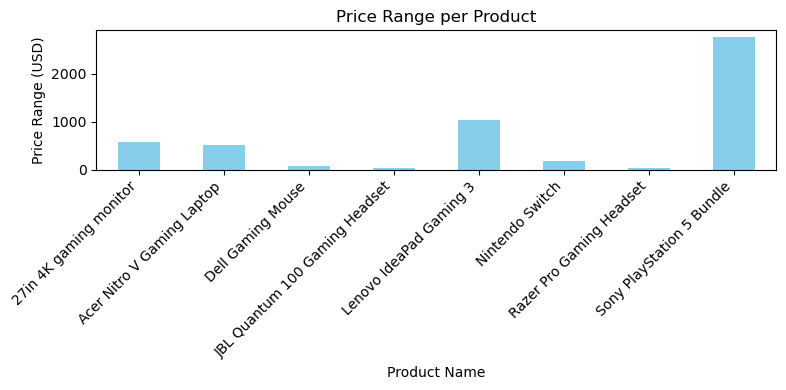

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
price_range['Price_range'].plot(kind='bar', color='skyblue')
plt.title('Price Range per Product')
plt.ylabel('Price Range (USD)')
plt.xlabel('Product Name')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

_**What are the top-selling products and platforms?**_

In [21]:
#wkb.groupby('Updated Prod Name')['USER_ID'].count().sort_values(ascending = False)

#PRODUCTS BASIS PURCHASE FREQUENCY AND REVENUE
top_products = wkb.groupby('Updated Prod Name').agg({'USER_ID':'count', 'USD_PRICE':'sum'}).sort_values(by=['USD_PRICE'],ascending = False).reset_index()

#ANALYSING THE REVENUE BASIS PLATFORMS FOR ALL PRODUCTS
wkb.groupby(['Updated Prod Name', 'MARKETING_CHANNEL']).agg({'MARKETING_CHANNEL':'count','USD_PRICE':'sum'}) #Adding Marketing_channel to groupby for a breakup of marketing channels

#FILTERING THE CHANNELS THAT DRIVE THE HIGHEST AND LOWEST REVENUE - PER PRODUCT

#Incorrect Approach: revenue = wkb.groupby(['Updated Prod Name', 'MARKETING_CHANNEL']).agg({'MARKETING_CHANNEL':'count','USD_PRICE':'sum'}).reset_index() 
# >> leads to an erros since reset_index() converts Marketing_Channel to column, then agg count on Marketing_Channel tries adding another column with the same name - duplication error

#Correct Approach: RENAMING THE AGGREGATED COLUMNS 
revenue_df = wkb.groupby(['Updated Prod Name', 'MARKETING_CHANNEL']) \
            .agg(Channel_Count=('USER_ID', 'count'), Total_Revenue=('USD_PRICE', 'sum')) \
            .reset_index()
           
#revenue_df.loc[revenue_df.groupby('Updated Prod Name')['Total_Revenue'].idxmin()]
#revenue_df.loc[revenue_df.groupby('Updated Prod Name')['Total_Revenue'].idxmax()]

#FILTERING THE TOP 2 and BOTTOM 2 (instead of max and min)
#revenue_df.sort_values(by=['Updated Prod Name','Total_Revenue'],ascending = [True,False]).groupby('Updated Prod Name').head(2)  #simply sorting by Total_Revenue doesnt sort the Products in the output

top_products.round({'USD_PRICE':2}) #rounding decimal places

,Updated Prod Name,USER_ID,USD_PRICE
0,27in 4K gaming monitor,4686,1953153.99
1,Nintendo Switch,10288,1642516.98
2,Sony PlayStation 5 Bundle,967,1573073.47
3,Lenovo IdeaPad Gaming 3,669,735506.56
4,JBL Quantum 100 Gaming Headset,4296,96220.07
5,Acer Nitro V Gaming Laptop,87,65661.18
6,Dell Gaming Mouse,719,36694.15
7,Razer Pro Gaming Headset,7,884.23


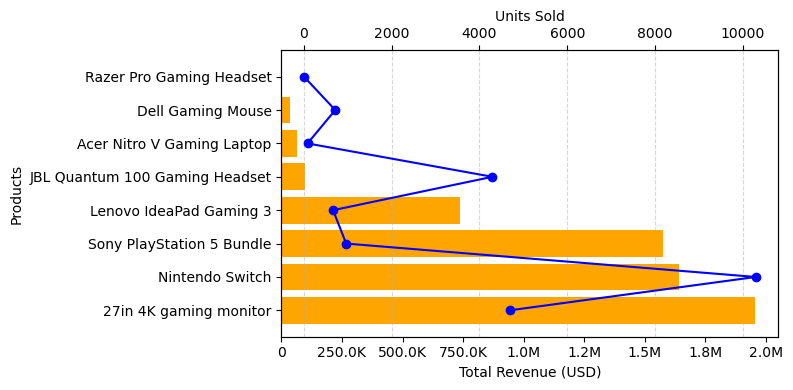

In [35]:
#PLOTTING DUAL GRAPH - LINE + BAR PLOT
import matplotlib.pyplot as plt
import pandas as pd

# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(8, 4))

# Custom function to format numbers
def human_format(x, _):
    if x >= 1_000_000_000:
        return f'{x/1_000_000_000:.1f}B'
    elif x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x/1_000:.1f}K'
    else:
        return f'{x:.0f}'

# Bar plot (horizontal) for units sold
bars = ax1.barh(top_products['Updated Prod Name'], top_products['USD_PRICE'], color='orange', label='Units Sold')
ax1.set_xlabel('Total Revenue (USD)')
ax1.set_ylabel('Products')

# Add second Y-axis
ax2 = ax1.twiny()

# Line plot for revenue
ax2.plot(top_products['USER_ID'], top_products['Updated Prod Name'], color='blue', marker='o', label='Total Revenue')
ax2.set_xlabel('Units Sold')

# Format revenue axis ticks
from matplotlib.ticker import FuncFormatter
ax1.xaxis.set_major_formatter(FuncFormatter(human_format))

# Title and layout
#plt.title('Units Sold vs. Total Revenue by Product')
fig.tight_layout()
plt.grid(True, axis='x', linestyle='--', alpha=0.5)

# Show plot
plt.show()

In [22]:
#CREATING A NEW PIVOT TABLE
channel_analysis = revenue_df.drop(columns = ['Channel_Count'])
channel_analysis_pivot = channel_analysis.pivot_table(index = 'Updated Prod Name', columns = 'MARKETING_CHANNEL', values = 'Total_Revenue', margins = True, margins_name='Total')

#SORTING BY TOTAL REVENUE PER CHANNEL (TOTAL COLUMN)
sorted_channel_revenue = channel_analysis_pivot.sort_values(by = 'Total', axis = 1, ascending = False)
sorted_channel_revenue

#SORTING BY TOTAL REVENUE FOR PRODUCTS (TOTAL ROW)
sorted_USD = channel_analysis_pivot.sort_values(by = 'Total',ascending = False)

#ROUNDING FLOAT COLUMNS TO DECIMAL PLACES
sorted_USD = sorted_USD.round({col: 2 for col in sorted_USD.select_dtypes(include='float').columns})
sorted_USD

#Dropping the Total column to exclude it from plotting
sorted_USD_upd = sorted_USD.drop(columns = ['Total'])
sorted_USD_upd = sorted_USD_upd.drop(['Total'])
sorted_USD_upd

MARKETING_CHANNEL,Unknown,affiliate,direct,email,social media
Updated Prod Name,,,,,
27in 4K gaming monitor,6243.80,86594.41,1631263.97,205260.01,23791.80
Nintendo Switch,12285.29,46899.85,1332958.64,221412.90,28960.30
Sony PlayStation 5 Bundle,9960.30,74955.68,1395005.64,84672.65,8479.20
Lenovo IdeaPad Gaming 3,7865.42,5144.70,671372.16,45267.41,5856.87
JBL Quantum 100 Gaming Headset,427.39,2793.54,72842.17,18785.23,1371.74
Acer Nitro V Gaming Laptop,798.00,3757.48,54685.46,6420.24,NaN
Dell Gaming Mouse,405.56,149.15,13009.07,22549.94,580.42
Razer Pro Gaming Headset,119.98,NaN,138.26,625.99,NaN


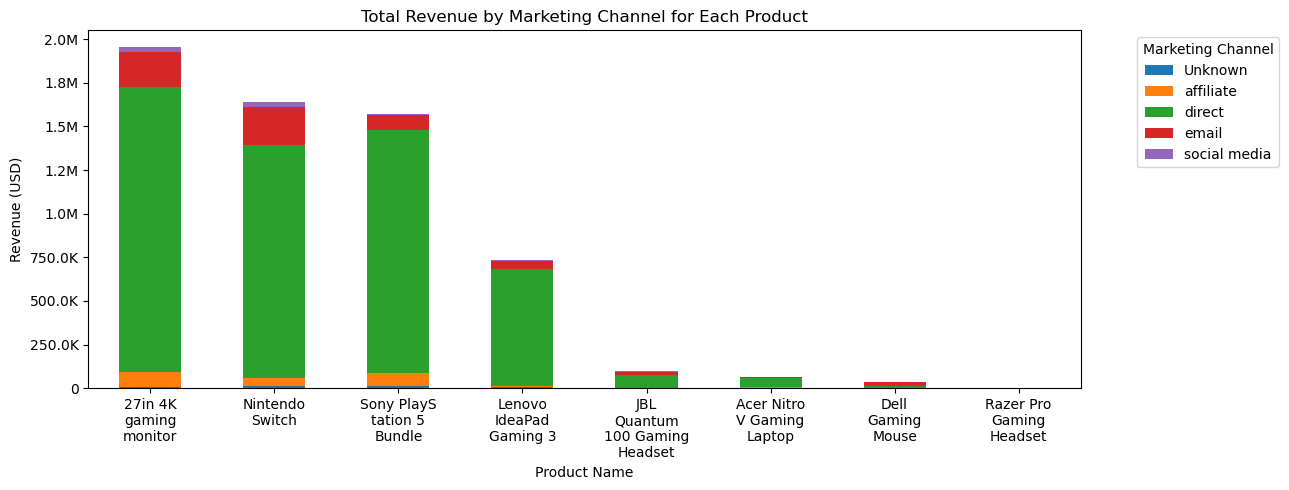

In [23]:
#PLOTTING A STACKED CHART
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator,FuncFormatter
import textwrap

# Custom function to format numbers
def human_format(x, _):
    if x >= 1_000_000_000:
        return f'{x/1_000_000_000:.1f}B'
    elif x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x/1_000:.1f}K'
    else:
        return f'{x:.0f}'

# Plot
ax = sorted_USD_upd.plot(kind='bar', stacked=True, figsize=(13,5))

# Apply the formatter to Y-axis
ax.yaxis.set_major_formatter(FuncFormatter(human_format))
ax.yaxis.set_major_locator(MultipleLocator(250_000))

#Wrap Text on X axis
ax.set_xticklabels([textwrap.fill(label.get_text(), 10) for label in ax.get_xticklabels()])

# Labels and title
plt.title('Total Revenue by Marketing Channel for Each Product')
plt.ylabel('Revenue (USD)')
plt.xlabel('Product Name')
plt.xticks(rotation=0)
plt.legend(title='Marketing Channel', bbox_to_anchor=(1.05, 1), loc='upper left')

#Data Labels, applying the same format as Y-axis labels
#for container in ax.containers:
#     ax.bar_label(container, labels=[f'₹{v/1_000_000:.1f}M' if v > 0 else '' for v in container.datavalues],
#                 label_type='center', fontsize=8)

plt.tight_layout()
plt.show()

_**How does purchase volume vary by day of the week?**_

In [39]:
#wkb.groupby(wkb['Purchase Date'].dt.dayofweek)['USD_PRICE'].sum().reset_index() #gives output in the form of 0-6: Monday-Sunday
day_wise_sales = wkb.groupby(wkb['Purchase Date'].dt.day_name())['USD_PRICE'].sum().reset_index()  #gives the day name (without creating a col)
day_wise_sales

# Sort by weekday (Mon to Sun)
day_wise_sales.rename(columns = {'Purchase Date':'Weekday'}, inplace = True)
day_wise_sales
day_wise_sales['Day'] = pd.Categorical(day_wise_sales['Weekday'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
day_wise_sales.sort_values('Day')

,Weekday,USD_PRICE,Day
1,Monday,847934.05,Monday
5,Tuesday,848166.54,Tuesday
6,Wednesday,874614.92,Wednesday
4,Thursday,880409.44,Thursday
0,Friday,910304.71,Friday
2,Saturday,882156.55,Saturday
3,Sunday,859875.92,Sunday


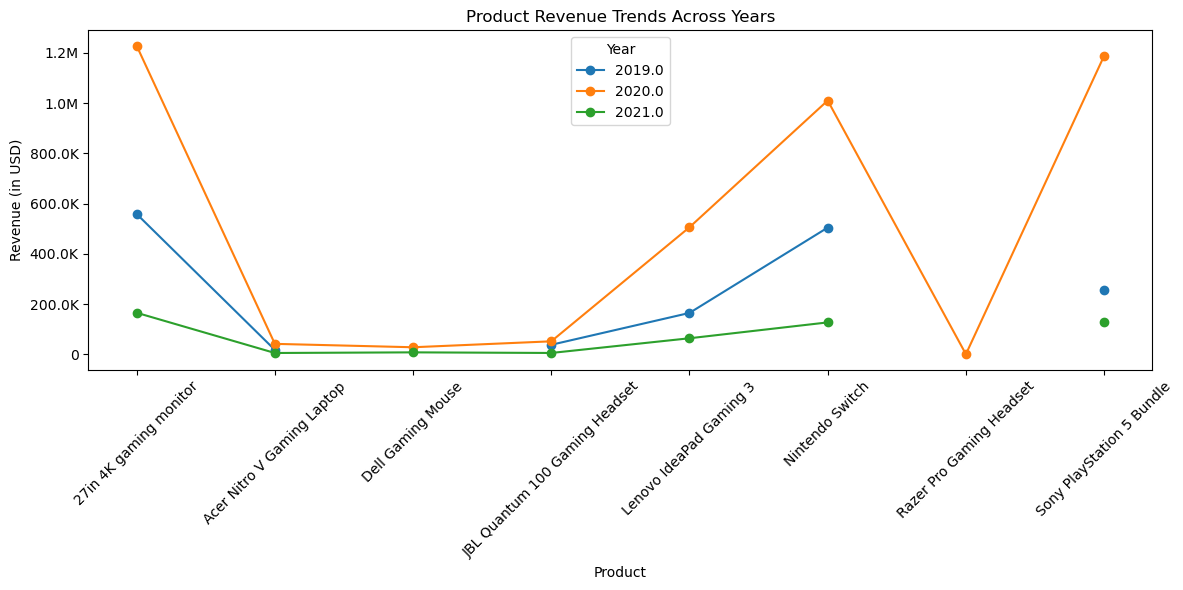

In [25]:
yr_wise_sales = wkb.groupby([wkb['Purchase Date'].dt.year,'Updated Prod Name'])['USD_PRICE'].sum().reset_index()
yr_wise_sales

# Step 2: Pivot so that products are rows and years are columns
pivot_df = yr_wise_sales.pivot(index='Updated Prod Name', columns='Purchase Date', values='USD_PRICE')

# Step 3: Plot
ax = pivot_df.plot(kind='line', marker='o', figsize=(12, 6))

# Custom function to format numbers
def human_format(x, _):
    if x >= 1_000_000_000:
        return f'{x/1_000_000_000:.1f}B'
    elif x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x/1_000:.1f}K'
    else:
        return f'{x:.0f}'

# Apply the formatter to Y-axis
ax.yaxis.set_major_formatter(FuncFormatter(human_format))

# Step 4: Formatting
ax.set_title('Product Revenue Trends Across Years')
ax.set_ylabel('Revenue (in USD)')
ax.set_xlabel('Product')
ax.legend(title='Year')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

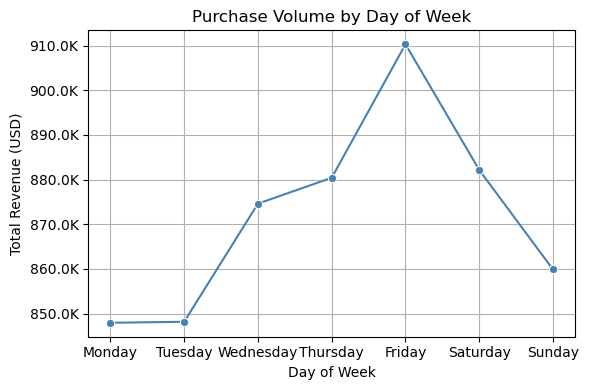

In [52]:
#PLOTTING TRENDLINE FOR DAY-WISE SALES
import seaborn as sns

# Plot
plt.figure(figsize=(6, 4))
ax = sns.lineplot(data=day_wise_sales, x='Day', y='USD_PRICE', marker='o', color='steelblue')

# Custom function to format numbers
def human_format(x, _):
    if x >= 1_000_000_000:
        return f'{x/1_000_000_000:.1f}B'
    elif x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x/1_000:.1f}K'
    else:
        return f'{x:.0f}'


# Apply the formatter to Y-axis
ax.yaxis.set_major_formatter(FuncFormatter(human_format))
#ax.yaxis.set_major_locator(MultipleLocator(250_000))

# Highlight Friday
#friday_value = day_wise_sales[day_wise_sales['Weekday'] == 'Friday']['USD_PRICE'].values[0]
#plt.annotate('Peak Day (Friday)', xy=('Friday', friday_value),
#             xytext=('Thursday', friday_value + 20000),
#             arrowprops=dict(facecolor='green', arrowstyle='->'),
#             fontsize=11, color='green')


# Enhancements
plt.title('Purchase Volume by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Revenue (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

_**What is the average shipping time across countries or platforms?**_

In [65]:
#COUNTRY-WISE AVERAGE SHIPPING DELAY
#tat_check = wkb.groupby('COUNTRY_CODE')['TAT_int'].mean().reset_index()
#tat_check_1 = tat_check.loc[tat_check['TAT_int']>0]
#tat_check_1

#OR

wkb.groupby('COUNTRY_CODE')['TAT_int'].mean().reset_index().astype({'TAT_int':'int'}).query('TAT_int>0')

,COUNTRY_CODE,TAT_int
2,AI,3
3,AL,2
4,AO,2
5,AP,1
9,AW,2
...,...,...
142,VC,1
144,VI,2
146,VU,2
148,ZM,2


In [62]:
#MAXIMUM DELAY
wkb.sort_values(by='TAT_int',ascending = False)

#OPERATIONAL RISK ANALYSIS - DELAY OF > 3 DAYS
#INCORRECT ATTEMPT: wkb['ops_delay'] = wkb['TAT_int'].apply(lambda x: "Late" if x['TAT_int']>3 else "In Time") #Using .apply() on a Series, NOT a dataframe. So x['TAT_int']>3 gives an error

#CORRECTED: wkb['ops_delay'] = wkb['TAT_int'].apply(lambda x: "Late" if x>3 else "In Time") 

#OR

import numpy as np
wkb['ops_delay'] = np.where(wkb['TAT_int'] > 3, 'Late', 'In Time')

#OR

wkb['ops_delay'] = wkb.apply(lambda x: "Late" if x['TAT_int']>3 else "In Time", axis =1) #here x is a dictionary-like object
len(wkb[wkb['ops_delay']=="Late"])/len(wkb)*100

0.00920852709609098

_**Catalog Engagement + Avg Order Value**_

In [19]:
#PRODUCT DIVERSITY ACROSS COUNTRIES

#INCORRECT ATTEMPT: #wkb.groupby('COUNTRY_CODE')['Updated Prod Name'].agg(Prod_Coverage = ('Updated Prod Name','nunique'))  #should not be selecting a single column before .agg() as agg() works on a DataFrameGroupBy object, not SeriesGroupBy

#CORRECT ATTEMPT:
#prod_coverage = wkb.groupby('COUNTRY_CODE')['Updated Prod Name'].nunique().reset_index()
#prod_coverage[prod_coverage['Updated Prod Name']<4]

#OR

#prod_coverage = wkb.groupby('COUNTRY_CODE')['Updated Prod Name'].nunique().reset_index(name='Prod_Coverage')  #Rename column in result, no other difference
#prod_coverage[prod_coverage['Prod_Coverage']<4]

#OR

#wkb.groupby('COUNTRY_CODE').agg(Prod_Coverage = ('Updated Prod Name','nunique')).reset_index()

prod_coverage = wkb.groupby('COUNTRY_CODE').agg(Prod_Coverage = ('Updated Prod Name','nunique'), Orders_Num = ('Updated Prod Name','count')).reset_index()
prod_coverage

cov_by_country = prod_coverage.groupby('Prod_Coverage')['COUNTRY_CODE'].count().reset_index()
cov_by_country['%_country_wise']= cov_by_country['COUNTRY_CODE']/150
cov_by_country
#cov_by_country.to_excel("prod_coverage_output.xlsx", index=False)

,Prod_Coverage,COUNTRY_CODE,%_country_wise
0,1,28,0.186667
1,2,24,0.160000
2,3,28,0.186667
3,4,15,0.100000
4,5,11,0.073333
5,6,27,0.180000
6,7,13,0.086667
7,8,4,0.026667


In [20]:
#CREATING A TABLE WITH Country, Prod Count, AOV - MAPPING AOV

#METHOD 1: MERGING TABLES
prod_coverage_merged = pd.merge(prod_coverage, wkb, on="COUNTRY_CODE",how = "left")
prod_coverage_merged

#METHOD 2: by creating a lookup dictionary
country_aov = wkb.set_index('COUNTRY_CODE')['Avg_Order_Val_Country'].to_dict()
prod_coverage['AOV_country'] = prod_coverage['COUNTRY_CODE'].map(country_aov)

#CORRELATION BETWEEN PRODUCT DIVERSITY AND AOV
filtered_df = prod_coverage[prod_coverage['Orders_Num']>=5]
filtered_df

,COUNTRY_CODE,Prod_Coverage,Orders_Num,AOV_country
1,AE,6,42,322.095714
3,AL,3,5,235.200000
6,AR,6,103,319.969515
7,AT,7,118,363.103644
8,AU,8,889,208.814387
...,...,...,...,...
140,US,8,10231,287.085599
141,UY,4,9,521.337778
143,VE,3,9,105.680000
145,VN,4,23,222.573913


Text(0.5, -18.27777777777778, 'Product Coverage')

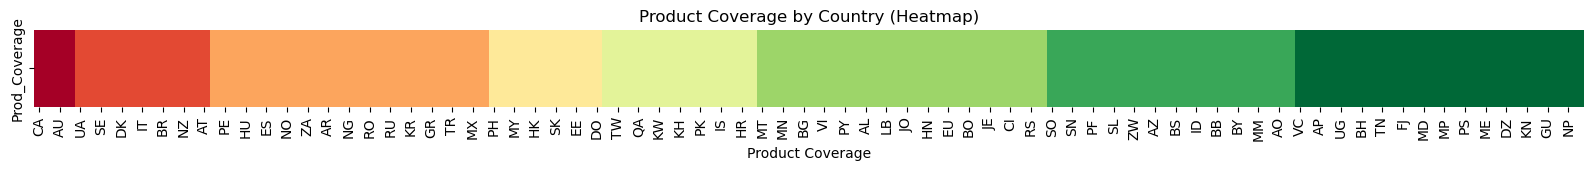

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort for better visual clarity
sorted_df1 = prod_coverage.sort_values(by='Prod_Coverage', ascending=False)

plt.figure(figsize=(20, 1))
sns.heatmap(data=sorted_df1[['Prod_Coverage']].set_index(sorted_df1['COUNTRY_CODE']).T,
            cmap='RdYlGn_r', annot=False, cbar=False)
plt.title("Product Coverage by Country (Heatmap)")
plt.xlabel("Product Coverage")

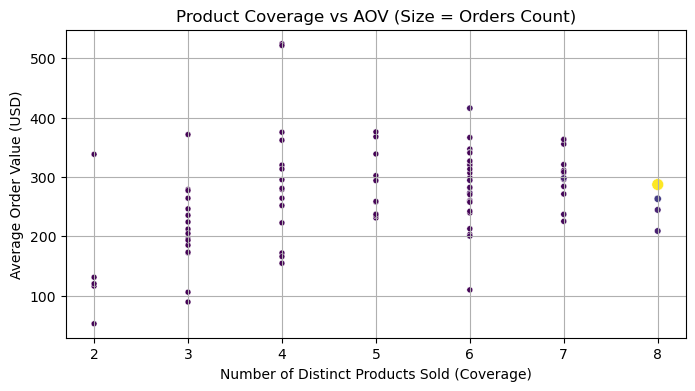

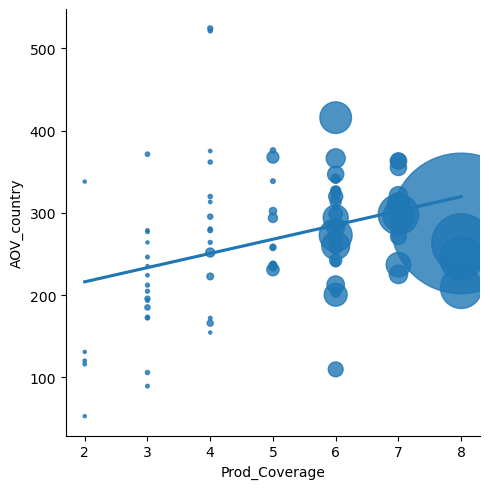

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.scatterplot(data=filtered_df, x='Prod_Coverage', y='AOV_country', size='Orders_Num', hue='Orders_Num', palette='viridis', legend=False)
plt.title('Product Coverage vs AOV (Size = Orders Count)')
plt.xlabel('Number of Distinct Products Sold (Coverage)')
plt.ylabel('Average Order Value (USD)')
plt.grid(True)
plt.show()

sns.lmplot(data=filtered_df, x='Prod_Coverage', y='AOV_country', scatter_kws={'s': filtered_df['Orders_Num']}, ci=None)

_**SAVING FILES BACK TO EXCEL - Getting a list of all dataframes created**_

In [32]:
#Global() and Local() functions provide access to symbol tables that acts as a map, associating each identifier with relevant details such as its type, scope, and where it's located in memory.

import pandas as pd 

#GLOBAL VARIABLES
dataframes = {k: v for k, v in globals().items() if isinstance(v, pd.DataFrame)} #global variables are variables defined "outside" of any function or class are considered global. They have a scope throughout the entire program

#LOCAL VARIABLES
dataframes = {k for k, v in locals().items() if isinstance(v, pd.DataFrame)} #Variables defined inside a function are considered local to that function. Their scope is limited to the function in which they are defined, and they cease to exist once the function finishes execution.

# Print just the names
#print("DataFrames in memory:")
#for name in dataframes: #accesses the keys (dataframe names) of the dictionary
    #print(name)